In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import community
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_excel('judi_online_.xlsx')
df = df.drop(columns=['id', 'date', 'author_channel_url', 'edited_date', 'direct_reply_to', 'type'])
df

,author,text,author_channel_id,parent_post_id,parent_username,likes
0,Deddy Corbuzier,Tiktok.. Yes or No..?,UCYk4LJI0Pr6RBDWowMm-KUw,NaN,NaN,2236
1,Afendi Bekicot,"Ada combo 1 lagi \n\n, pinjol , wah savage itu...",UCrgHuFAQJZyZlV1PQfSNaIg,NaN,NaN,0
2,HALUcreators,Revolusi mental dari waras ke ??mntap,UCJuyNjz5WYgZ0oDDYUxAPmQ,NaN,NaN,0
3,Karapat Satria,Gacorr,UC54juLEPIjL4KVudFLB94yQ,NaN,NaN,0
4,David Gebog,List Yutouber ML yng suka di sawer judi :\n1. ...,UCeTu8CACsZUSpdGWwqKFTmQ,NaN,NaN,0
...,...,...,...,...,...,...
6869,namRiv,"Setahu gue si Fery ini staff ASN di kemenkeu, ...",UCLZEg6QhZTJIfFzfBTHEYgQ,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,4
6870,Dadan Wijaya,emg keren dah si ferry hariadi ini,UC__AI0xz21oBNiYQo0yDVJA,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,0
6871,david,gw pertama kali lihat videonya karena judulnya...,UCsBQ15gPe4HsSgAu10YNpHg,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,9
6872,Rafi Technic,Wkwk,UCWvSw1DMz8XzFl_9Rj5W0Lw,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,1


In [19]:
df = df.dropna(subset=['parent_post_id'])

# Mereset indeks dari DataFrame
df.reset_index(drop=True, inplace=True)
df

,author,text,author_channel_id,parent_post_id,parent_username,likes
0,DXNO CN,Wkakwkak,UCPrKRkVTKUuv_PUsqoxjjkQ,Ugw-ojo36RoNcoK2ACl4AaABAg,Agus Mahendra,0
1,rpztwo420.2,v vcvv v vcq v,UCQElNSbEq0PphJK1P3N3AiA,UgxIrS8EAaPquqKm7ux4AaABAg,Mie Ephen,0
2,rpztwo420.2,59:17,UCQElNSbEq0PphJK1P3N3AiA,UgxIrS8EAaPquqKm7ux4AaABAg,Mie Ephen,0
3,Hama Geyo,Sebagai influencer harusnya bisa mengajarkan y...,UC1sMZfDbHA9zklW3frBeYFQ,UgzIzrlc1e0dsropTwt4AaABAg,Wibfuu,0
4,Corn Tall 2 goal,Gak kasian kasian amat lah,UC1sMZfDbHA9zklW3frBeYFQ,UgzIzrlc1e0dsropTwt4AaABAg,Wibfuu,0
...,...,...,...,...,...,...
2291,namRiv,"Setahu gue si Fery ini staff ASN di kemenkeu, ...",UCLZEg6QhZTJIfFzfBTHEYgQ,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,4
2292,Dadan Wijaya,emg keren dah si ferry hariadi ini,UC__AI0xz21oBNiYQo0yDVJA,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,0
2293,david,gw pertama kali lihat videonya karena judulnya...,UCsBQ15gPe4HsSgAu10YNpHg,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,9
2294,Rafi Technic,Wkwk,UCWvSw1DMz8XzFl_9Rj5W0Lw,UgwyXrWcvmFbfdunbDZ4AaABAg,Anak pertama,1


In [20]:
# Inisialisasi graf
G = nx.Graph()

# Menambahkan simpul
for index, row in df.iterrows():
    G.add_node(row['author_channel_id'])
    G.add_node(row['parent_post_id'])
    G.add_edge(row['author_channel_id'], row['parent_post_id'])  

print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 1963
Number of edges 1730
Average degree 1.7626082526744777


In [21]:
# Get best partition
partition = community.best_partition(G)
print('Modularity: ', community.modularity(partition, G))

Modularity:  0.820406461959969


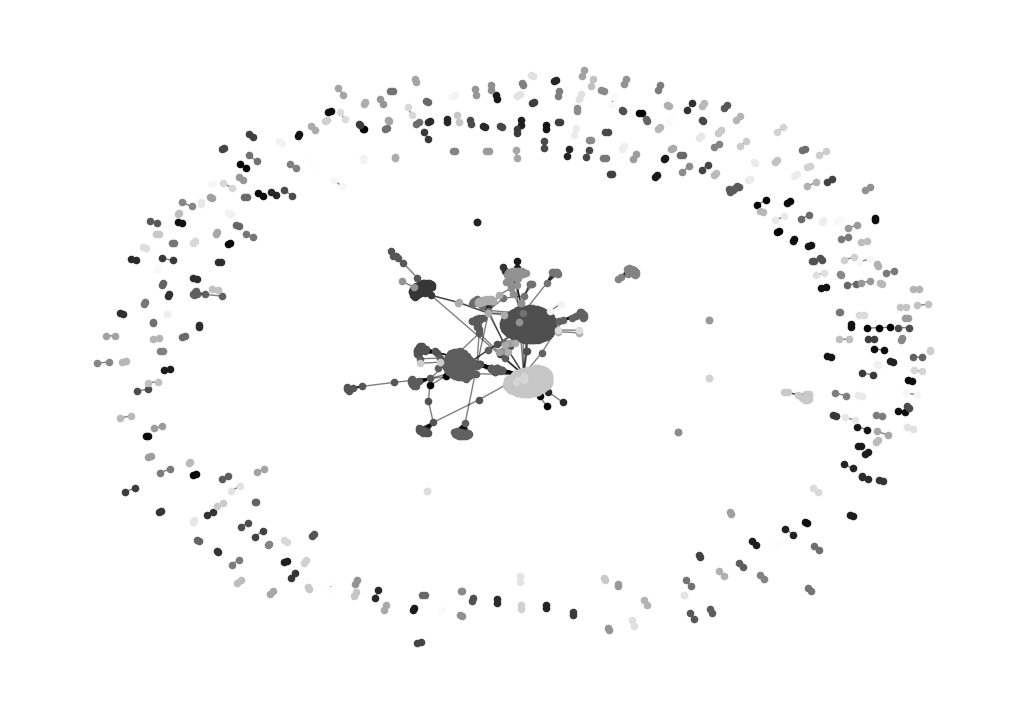

In [8]:
# Draw graph
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()):
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=20, node_color=str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [22]:
# Keep only communities with a minimum of authors
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 100

for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center

        # Print community
        print(f'Community of {center} (ID {com}) - {len(list_nodes)} authors:')
        print(list_nodes, '\n')


Community of Ugy5itai6nlll1gXI6F4AaABAg (ID 0) - 228 authors:
['UCPrKRkVTKUuv_PUsqoxjjkQ', 'Ugw-ojo36RoNcoK2ACl4AaABAg', 'UCKE0Coj3LG4xGw1HnT5TjHg', 'Ugw0NgkYwFvX-T4R7_R4AaABAg', 'UCkgEHMidptL69WS4Sw7Fhiw', 'UgxFWZFyjbW2Vn-3NvZ4AaABAg', 'UCPfjrD6hAf3V-f_wgtXFy2w', 'UgwXvB4XDV0b7xdcJjh4AaABAg', 'UC50wFlD6-ECCdMmqajVUC_g', 'Ugx8yMEPTG4CpFcVui54AaABAg', 'UCOTMcaddNyNiI9_qmY7YUOA', 'UCKzRxzZOCbE-7dEOlrDjxVw', 'Ugy5itai6nlll1gXI6F4AaABAg', 'UCQMQ39tLxvDL7CbQwDpItZw', 'UClKghRT20FV579P0e_9wcIA', 'UCAIv5rFBbo4rSYrOCAxZxUg', 'UCxgLZ4SsWJ3dQZzSAhH-lnA', 'UC_Qlj_JHxY8bq0EqbfHLsXw', 'UCUJ9XfeQ6U6Qt6ty_QzxBcA', 'UCuQW3kRHKNb_ziXHCHVxsFg', 'UCg9bjO92nT-Wc04jlB7kqbA', 'UCgS0W0MkWN8hdnLh1LsdfyQ', 'UCmDnrOIwnsg2ckIjIhvIHPA', 'UCbXpx6kzcU2woMGGB6MsmNg', 'UCQZ1ap09VbO4HNay0X_-zTQ', 'UCmgeK1b2HXPHwlDy5EzqtKA', 'UCmELoCdzjqATGvGuLMDO8nQ', 'UC0EejZscj1yRAv7ep6UnNaQ', 'UCE1Ft51-UOiztAbvj1PUO_w', 'UCN4d8clB9yeG-chXzsd1E5g', 'UCHH1Px6l3xgJOwJxz3bqetQ', 'UCkK5DSNWKnUGjp9BSCrE-UQ', 'UCvZLDpCEO38FGhOacz5dDPA', '

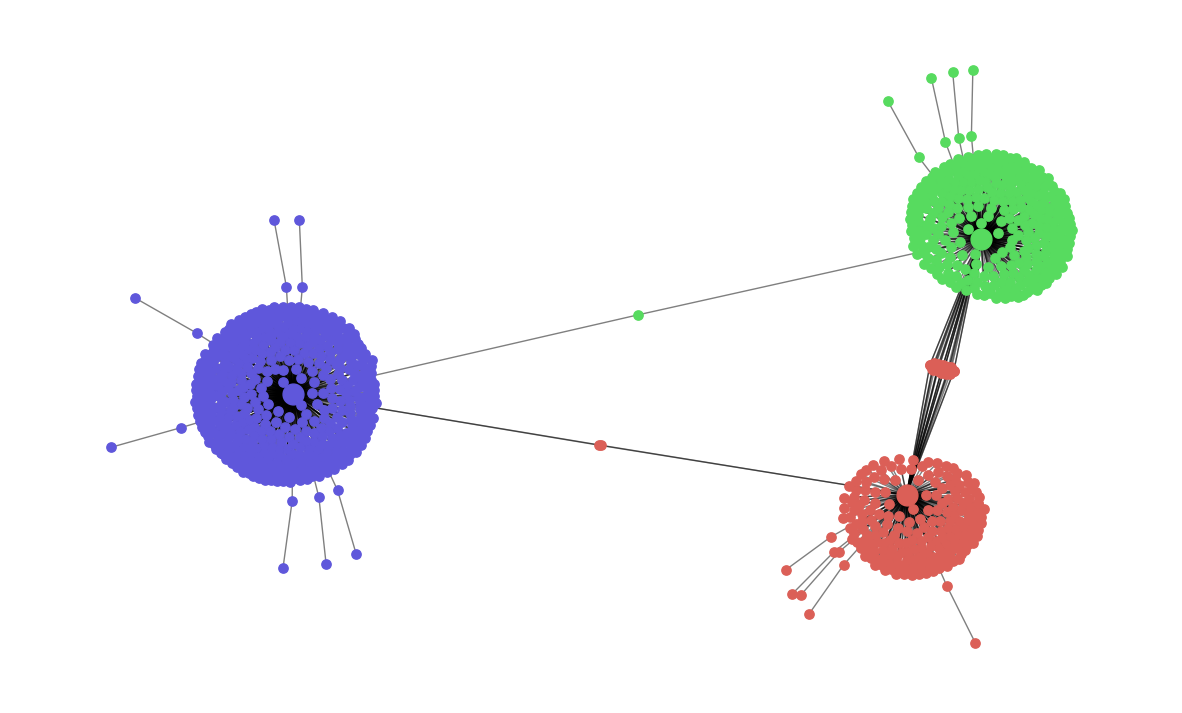

In [32]:
# Display graph
plt.figure(figsize=(15, 9))
node_size = 45
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size=node_size, node_color=colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size=node_size * 5, node_color=colors[com])

nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)

plt.axis('off')
plt.show()
